In [1]:
import csv
import os
import sys
# Spark imports
from pyspark.sql import DataFrame
from pyspark.sql import SparkSession

In [2]:
sys.path.insert(0, '311_Service_Request_Analysis/src')
sys.path.insert(0, '311_Service_Request_Analysis/results/Analysis/Q1')
import Utilities as utilFor311
import Constants

In [3]:
def init_spark():
    spark = SparkSession \
        .builder \
        .appName("NYC 311 Data Analysis") \
        .config('spark.sql.codegen.wholeStage', 'false') \
        .getOrCreate()
    return spark

In [4]:
filename_19 = "data/311_Cleaned_Data_2019.csv"
filename_18 = "data/311_Cleaned_Data_2018.csv"
Constants.RESULTS_FOLDER_ANALYSIS_Q1 = '311_Service_Request_Analysis/results/Analysis/Q1/'

In [5]:
spark = init_spark()

In [6]:
nyc_311_df_2019 = spark.read.csv(filename_19, inferSchema=True, header=True)
nyc_311_df_2018 = spark.read.csv(filename_18, inferSchema=True, header=True)

In [7]:
%matplotlib inline

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def create_x_y_coordinates_for_group_by_results(group_by_result, col_name):
    '''
    Converts Group By Result (after collect()) into list of X , Y coordinates, which can then be used for Visualizations
    '''
    x = [entry.__getitem__(col_name) for entry in group_by_result]
    y = [entry.__getitem__("count") for entry in group_by_result]
    return x, y


def plot_chart_x_y(x, y, title, x_label, y_label, fig_num, x_ticks=None, x_ticks_lables=None, y_ticks=None,
                   y_ticks_lables=None, x_tick_rotation=None):
    plt.figure(num=fig_num, figsize=(8, 4))

    plt.bar(x, y, align='center', color='blue', alpha=.5)

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if x_tick_rotation is not None:
        plt.xticks(rotation = x_tick_rotation)
    if x_ticks is not None:
        if x_ticks_lables is not None:
            plt.xticks(x_ticks, x_ticks_lables)
        else:
            plt.xticks(x_ticks)
    if y_ticks is not None:
        if y_ticks_lables is not None:
            plt.yticks(y_ticks, y_ticks_lables)
        else:
            plt.yticks(y_ticks)

    plt.title(title)
    plt.savefig(Constants.RESULTS_FOLDER_ANALYSIS_Q1 + str(fig_num) + '.png')


def prepare_plot(df, col_name, title, x_label, y_label, fig_num, x_ticks=None, x_ticks_lables=None, y_ticks=None,
                 y_ticks_lables=None, x_tick_rotation=None):
    df_groupby_col = df.groupby(col_name).count().orderBy(col_name).collect()
    x, y = create_x_y_coordinates_for_group_by_results(df_groupby_col, col_name)
    plot_chart_x_y(x, y, title, x_label, y_label, fig_num, x_ticks, x_ticks_lables, y_ticks, y_ticks_lables, x_tick_rotation=x_tick_rotation)


def show_plot():
    plt.show()

## Complaint Wise Distribution in 2019 and 2018

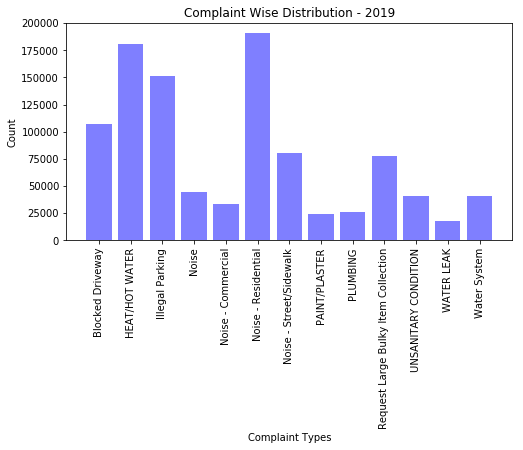

In [10]:
prepare_plot(nyc_311_df_2019, 'Complaint_Type',
                            "Complaint Wise Distribution - 2019", "Complaint Types", "Count", 1, x_tick_rotation='vertical')

show_plot()

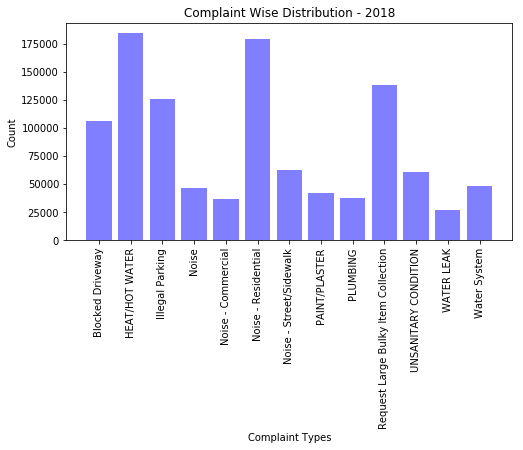

In [11]:
prepare_plot(nyc_311_df_2018, 'Complaint_Type',
                            "Complaint Wise Distribution - 2018", "Complaint Types", "Count", 2, x_tick_rotation='vertical')

show_plot()

In [12]:
nyc_311_df_2019.groupBy('Borough').count().filter('count > 5000').select('Borough').distinct().collect()

[Row(Borough='QUEENS'),
 Row(Borough='BROOKLYN'),
 Row(Borough='BRONX'),
 Row(Borough='MANHATTAN'),
 Row(Borough='STATEN ISLAND')]

## Complaint Wise Distribution in Queens in 2019 and 2018

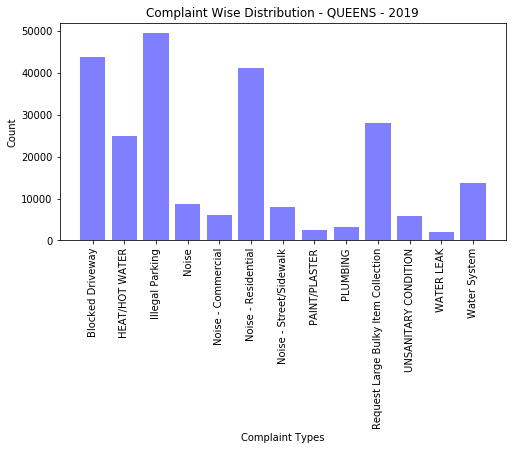

In [13]:
nyc_311_df_queens_2019 = nyc_311_df_2019.filter(nyc_311_df_2019['Borough'] == 'QUEENS')
prepare_plot(nyc_311_df_queens_2019, 'Complaint_Type',
                            "Complaint Wise Distribution - QUEENS - 2019", "Complaint Types", "Count", 3, x_tick_rotation='vertical')

show_plot()

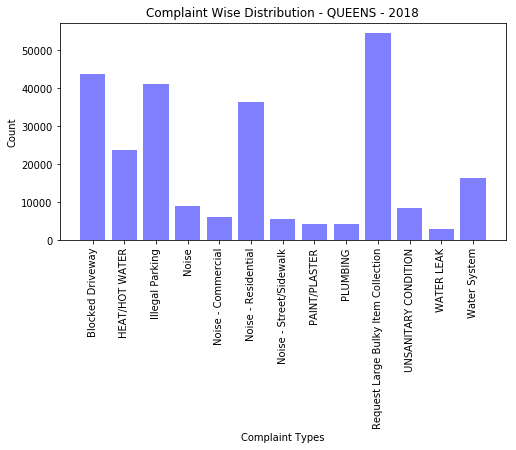

In [14]:
nyc_311_df_queens_2018 = nyc_311_df_2018.filter(nyc_311_df_2018['Borough'] == 'QUEENS')
prepare_plot(nyc_311_df_queens_2018, 'Complaint_Type',
                            "Complaint Wise Distribution - QUEENS - 2018", "Complaint Types", "Count", 4, x_tick_rotation='vertical')

show_plot()

## Complaint Wise Distribution in Brooklyn in 2019 and 2018

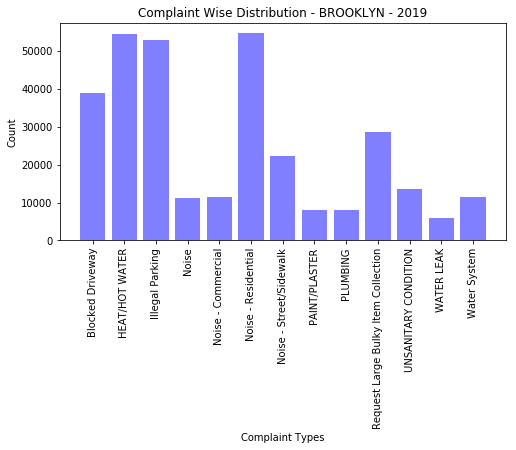

In [15]:
nyc_311_df_brooklyn_2019 = nyc_311_df_2019.filter(nyc_311_df_2019['Borough'] == 'BROOKLYN')
prepare_plot(nyc_311_df_brooklyn_2019, 'Complaint_Type',
                            "Complaint Wise Distribution - BROOKLYN - 2019", "Complaint Types", "Count", 5, x_tick_rotation='vertical')

show_plot()

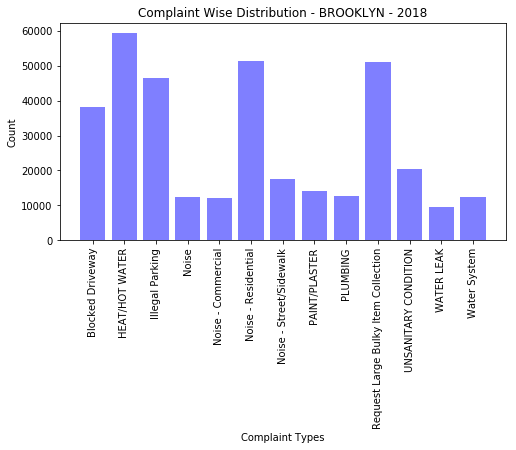

In [16]:
nyc_311_df_brooklyn_2018 = nyc_311_df_2018.filter(nyc_311_df_2018['Borough'] == 'BROOKLYN')
prepare_plot(nyc_311_df_brooklyn_2018, 'Complaint_Type',
                            "Complaint Wise Distribution - BROOKLYN - 2018", "Complaint Types", "Count", 6, x_tick_rotation='vertical')

show_plot()

## Complaint Wise Distribution in Bronx in 2019 and 2018

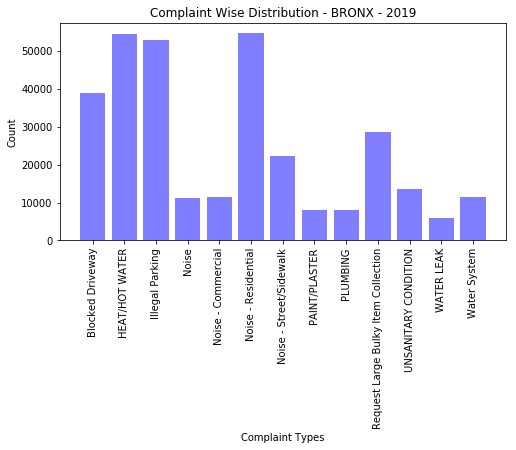

In [17]:
nyc_311_df_bronx_2019 = nyc_311_df_2019.filter(nyc_311_df_2019['Borough'] == 'BRONX')
prepare_plot(nyc_311_df_brooklyn_2019, 'Complaint_Type',
                            "Complaint Wise Distribution - BRONX - 2019", "Complaint Types", "Count", 7, x_tick_rotation='vertical')

show_plot()

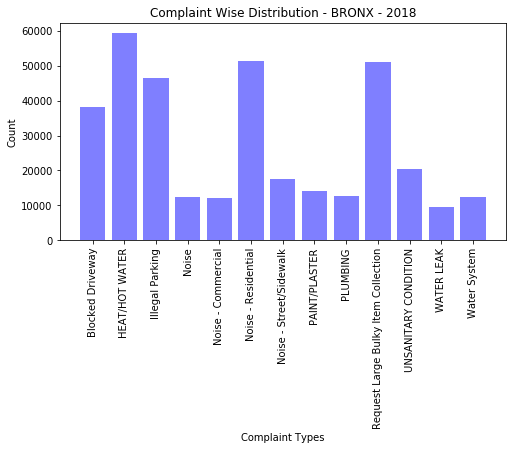

In [18]:
nyc_311_df_bronx_2018 = nyc_311_df_2018.filter(nyc_311_df_2018['Borough'] == 'BRONX')
prepare_plot(nyc_311_df_brooklyn_2018, 'Complaint_Type',
                            "Complaint Wise Distribution - BRONX - 2018", "Complaint Types", "Count", 8, x_tick_rotation='vertical')

show_plot()

## Complaint Wise Distribution in Manhattan in 2019 and 2018

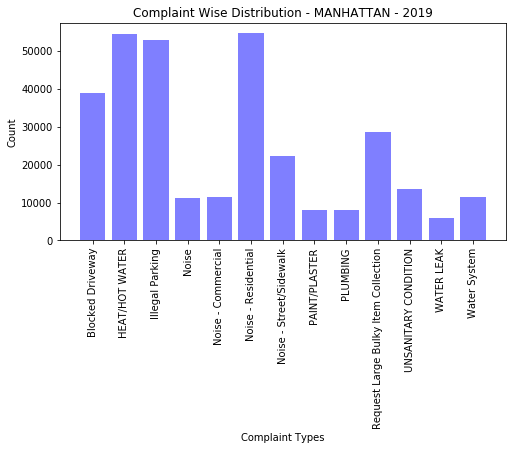

In [19]:
nyc_311_df_manhattan_2019 = nyc_311_df_2019.filter(nyc_311_df_2019['Borough'] == 'MANHATTAN')
prepare_plot(nyc_311_df_brooklyn_2019, 'Complaint_Type',
                            "Complaint Wise Distribution - MANHATTAN - 2019", "Complaint Types", "Count", 9, x_tick_rotation='vertical')

show_plot()

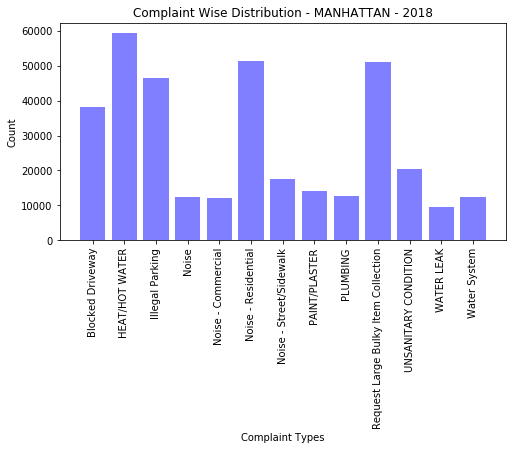

In [20]:
nyc_311_df_manhattan_2018 = nyc_311_df_2018.filter(nyc_311_df_2018['Borough'] == 'MANHATTAN')
prepare_plot(nyc_311_df_brooklyn_2018, 'Complaint_Type',
                            "Complaint Wise Distribution - MANHATTAN - 2018", "Complaint Types", "Count", 10, x_tick_rotation='vertical')

show_plot()

## Complaint Wise Distribution in Staten Island in 2019 and 2018

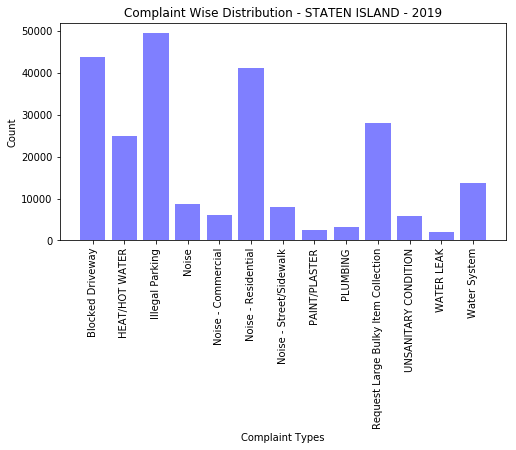

In [21]:
nyc_311_df_staten_island_2019 = nyc_311_df_2019.filter(nyc_311_df_2019['Borough'] == 'STATEN ISLAND')
prepare_plot(nyc_311_df_queens_2019, 'Complaint_Type',
                            "Complaint Wise Distribution - STATEN ISLAND - 2019", "Complaint Types", "Count", 11, x_tick_rotation='vertical')

show_plot()

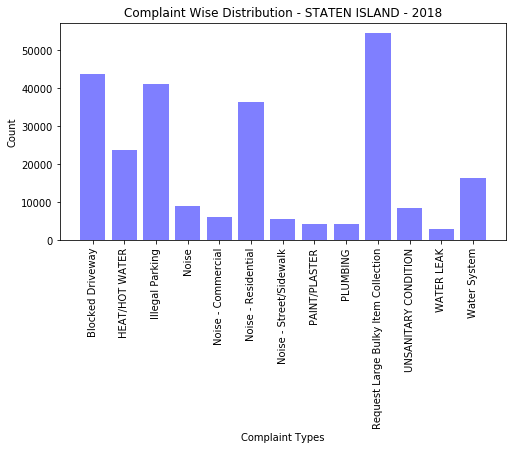

In [22]:
nyc_311_df_staten_island_2018 = nyc_311_df_2018.filter(nyc_311_df_2018['Borough'] == 'STATEN ISLAND')
prepare_plot(nyc_311_df_queens_2018, 'Complaint_Type',
                            "Complaint Wise Distribution - STATEN ISLAND - 2018", "Complaint Types", "Count", 12, x_tick_rotation='vertical')

show_plot()

In [1]:
def get_top_boroughs(df):
    '''
    Get the list of boroughs which has the most number of complaints getting
    '''
    boroughs = df.groupBy('Borough').count().filter('count > 5000').select('Borough').distinct().collect()
    top_boroughs = []
    for item in boroughs:
        top_boroughs.append(item[0])
    
    return top_boroughs

In [3]:
def plot_top_boroughs_complaint_wise(df, year):
    '''
    Plot the bar graphs of complaint distribution in top boroughs
    '''
    top_boroughs = get_top_boroughs(df)
    for i in range(len(top_boroughs)):
        nyc_311_df_borough = df.filter(nyc_311_df_2019['Borough'] == top_boroughs[i])
        prepare_plot(nyc_311_df_borough, 'Complaint_Type',
                                    "Complaint Wise Distribution - " + top_boroughs[i] + " - " + str(year), "Complaint Types", "Count", str(year)+"_"+str(i+1), x_tick_rotation='vertical')